### Importing Libraries

In [23]:
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import numpy as np


### Loading Data

In [25]:
# Define base directory
proj_work_base_dir = r"C:\Users\acer\Desktop\archive\images"

# Define train and validation directories
proj_work_train_dir = os.path.join(proj_work_base_dir, 'train')
proj_work_val_dir = os.path.join(proj_work_base_dir, 'validation')

# List classes from train directory
proj_work_classes = os.listdir(proj_work_train_dir)
print("Classes found:", proj_work_classes)


Classes found: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


### Distribution of Images

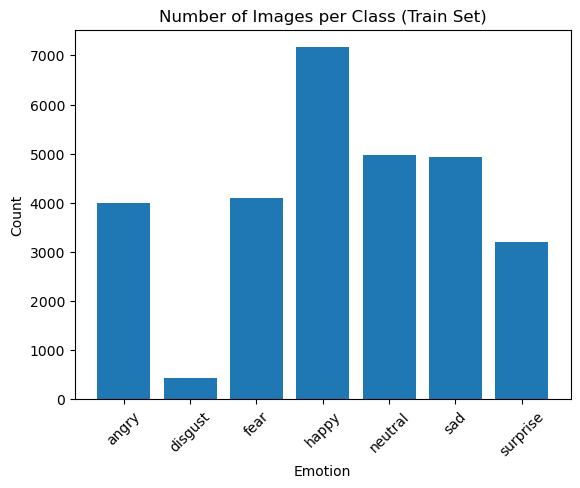

In [26]:
from collections import Counter

# Count images per class in train directory
proj_work_train_counts = {cls: len(os.listdir(os.path.join(proj_work_train_dir, cls))) for cls in proj_work_classes}

# Plot barplot
plt.bar(proj_work_train_counts.keys(), proj_work_train_counts.values())
plt.title("Number of Images per Class (Train Set)")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


### Random Image per category

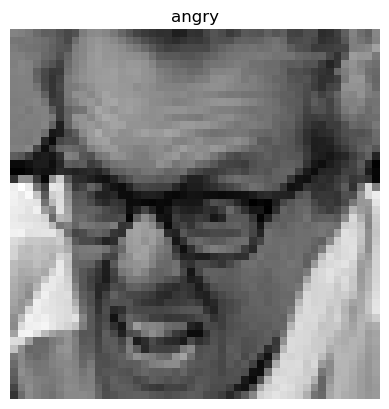

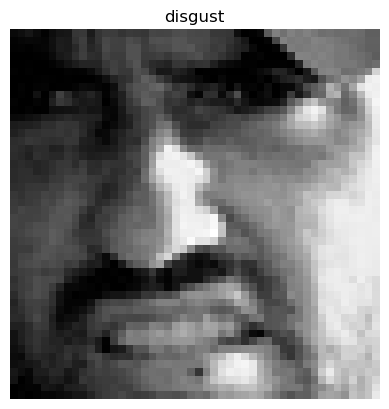

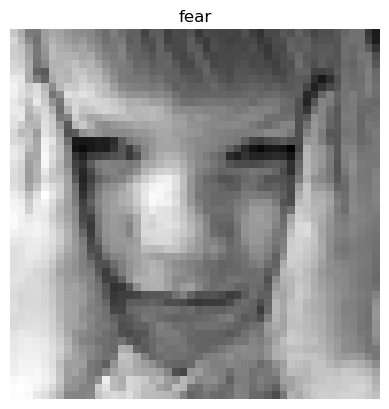

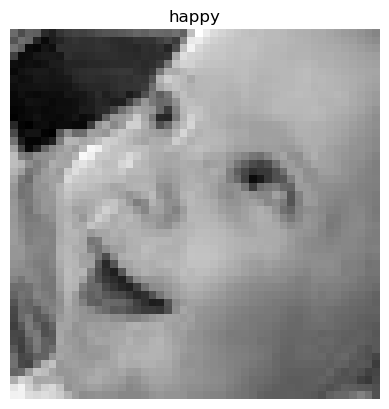

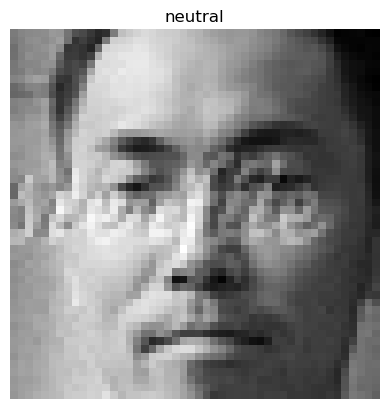

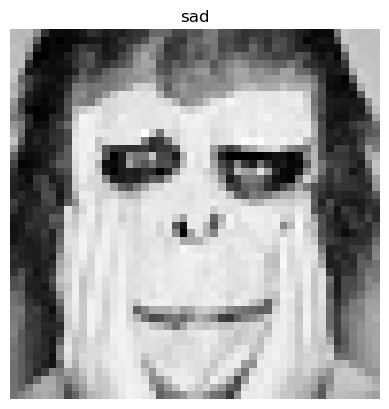

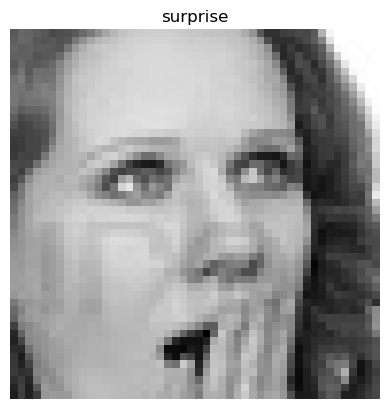

In [28]:
for emotion in proj_work_classes:
    emotion_dir = os.path.join(proj_work_train_dir, emotion)
    random_image = random.choice(os.listdir(emotion_dir))
    random_image_path = os.path.join(emotion_dir, random_image)
    
    # Display the image
    img = plt.imread(random_image_path)
    plt.imshow(img, cmap='gray')  # Grayscale
    plt.title(emotion)
    plt.axis('off')
    plt.show()


### Data Augumentation to increase Data

In [29]:
# Define image size and batch size
proj_work_img_size = (48, 48)
proj_work_batch_size = 32

# Data augmentation and rescaling for train and validation
proj_work_train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

proj_work_val_datagen = ImageDataGenerator(rescale=1.0/255)

# Data generators
proj_work_train_gen = proj_work_train_datagen.flow_from_directory(
    proj_work_train_dir,
    target_size=proj_work_img_size,
    batch_size=proj_work_batch_size,
    color_mode='grayscale',  # For grayscale images
    class_mode='categorical'
)

proj_work_val_gen = proj_work_val_datagen.flow_from_directory(
    proj_work_val_dir,
    target_size=proj_work_img_size,
    batch_size=proj_work_batch_size,
    color_mode='grayscale',  # For grayscale images
    class_mode='categorical'
)


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


### 1. Simple CNN Architecture

In [31]:
proj_work_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),  # Grayscale images have 1 channel
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(proj_work_classes), activation='softmax')
])

proj_work_model.summary()


C:\Users\acer\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling Model

In [32]:
proj_work_model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])


### Fitting Model

In [33]:
proj_work_history = proj_work_model.fit(
    proj_work_train_gen,
    epochs=30,
    validation_data=proj_work_val_gen
)


Epoch 1/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 47s 49ms/step - accuracy: 0.2436 - loss: 1.8195 - val_accuracy: 0.2535 - val_loss: 1.7894
Epoch 2/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 33s 36ms/step - accuracy: 0.2681 - loss: 1.7608 - val_accuracy: 0.3211 - val_loss: 1.6730
Epoch 3/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 32s 35ms/step - accuracy: 0.2975 - loss: 1.7142 - val_accuracy: 0.3998 - val_loss: 1.5595
Epoch 4/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 30s 34ms/step - accuracy: 0.3543 - loss: 1.6256 - val_accuracy: 0.4537 - val_loss: 1.4261
Epoch 5/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 34s 38ms/step - accuracy: 0.3887 - loss: 1.5507 - val_accuracy: 0.4843 - val_loss: 1.3543
Epoch 6/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 33s 36ms/step - accuracy: 0.4207 - loss: 1.4975 - val_accuracy: 0.4798 - val_loss: 1.3738
Epoch 7/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 33s 37ms/step - accuracy: 0.4386 - loss: 1.4580 - val_accuracy: 0.4907 - val_loss: 1.3372
Epoch 8/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 32s 35ms/step - accuracy: 0.4476 - loss: 1.4316 - 

### 2,Advanced Architecture

In [42]:
proj_work_model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Second Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # Third Convolutional Block
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    # Fully Connected Layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(len(proj_work_classes), activation='softmax')
])

proj_work_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 46, 46, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 21, 21, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,474,759 (9.44 MB)

 Trainable params: 2,472,839 (9.43 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [44]:
proj_work_model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

proj_work_history = proj_work_model.fit(
    proj_work_train_gen,
    epochs=30,
    validation_data=proj_work_val_gen
)


Epoch 1/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 117s 125ms/step - accuracy: 0.1946 - loss: 2.4613 - val_accuracy: 0.3087 - val_loss: 1.7330
Epoch 2/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 110s 122ms/step - accuracy: 0.2696 - loss: 1.8265 - val_accuracy: 0.3088 - val_loss: 1.6973
Epoch 3/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 114s 126ms/step - accuracy: 0.3184 - loss: 1.7147 - val_accuracy: 0.2594 - val_loss: 1.8448
Epoch 4/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 109s 121ms/step - accuracy: 0.3506 - loss: 1.6461 - val_accuracy: 0.3823 - val_loss: 1.6066
Epoch 5/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 113s 125ms/step - accuracy: 0.3692 - loss: 1.6093 - val_accuracy: 0.3842 - val_loss: 1.5580
Epoch 6/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 111s 123ms/step - accuracy: 0.3852 - loss: 1.5731 - val_accuracy: 0.3821 - val_loss: 1.6019
Epoch 7/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 117s 130ms/step - accuracy: 0.3943 - loss: 1.5441 - val_accuracy: 0.3793 - val_loss: 1.5620
Epoch 8/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 114s 126ms/step - accuracy: 0.3939 -

AbortedError: Graph execution error:

Detected at node StatefulPartitionedCall/sequential_2_1/conv2d_8_1/Relu defined at (most recent call last):
<stack traces unavailable>
Operation received an exception:Status: 1, message: could not create a memory object, in file tensorflow/core/kernels/mkl/mkl_conv_ops.cc:1112
	 [[{{node StatefulPartitionedCall/sequential_2_1/conv2d_8_1/Relu}}]] [Op:__inference_one_step_on_iterator_413700]

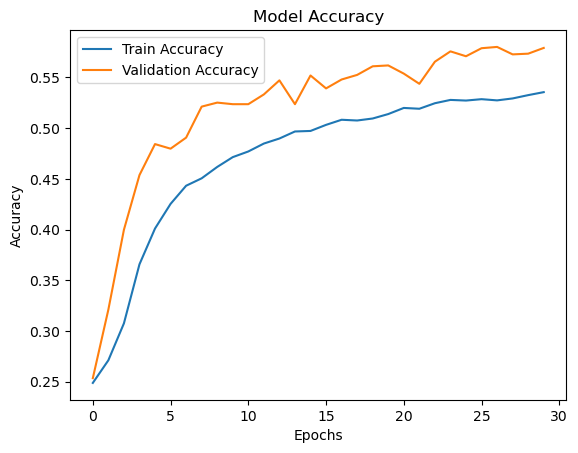

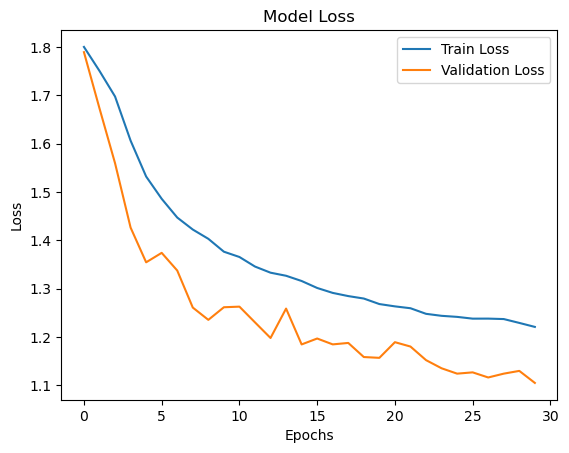

In [35]:
# Plot accuracy
plt.plot(proj_work_history.history['accuracy'], label='Train Accuracy')
plt.plot(proj_work_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(proj_work_history.history['loss'], label='Train Loss')
plt.plot(proj_work_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


I have cleaned the dataset by removing rows where `budget` and `runtime` were less than or equal to 0, as these values are invalid and provide no meaningful information about the movies. I checked the dimensions of the filtered dataset and analyzed the impact of filtering by summarizing key columns like `budget`, `revenue`, and `runtime`. To prepare the data for further analysis, I applied transformations: `popularity`, `budget`, and `vote_count` were log-transformed to reduce skewness, while `runtime` and `vote_average` were normalized using Min-Max scaling to bring values into a [0, 1] range. Finally, I summarized and previewed the cleaned and transformed dataset to ensure its readiness for further analysis.